In [6]:
import csv

import networkx as nx
import numpy as np

import feather as ft
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter
from operator import itemgetter
from os import listdir
from os.path import isfile, isdir, join, exists
from sklearn.preprocessing import MinMaxScaler

We need the average time for each node to become a stifler. then compute $k_{norm}$

In [7]:
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['font.size'] = 18

In [8]:
EmailURV = '../../src/datasets/EmailURV/EmailURV.csv'
Emailcontacts = '../../src/datasets/Emailcontacts/Emailcontacts.csv'

G = nx.Graph()
with open(EmailURV, 'r') as file:
    reader = csv.reader(file, delimiter=",")
    for row in reader:
        G.add_edge(int(row[0]), int(row[1]))
N_AGENTS = len(G.nodes())

minmax = {}
for i in range(max(nx.core_number(G).values()) + 1):
    subG = nx.k_core(G,i)
    maxG = max(dict(subG.degree).values())
    minG = min(dict(subG.degree).values())
    minmax[i] = {}
    minmax[i]['max'] = maxG
    minmax[i]['min'] = minG
minmax

{0: {'max': 71, 'min': 1},
 1: {'max': 71, 'min': 1},
 2: {'max': 70, 'min': 2},
 3: {'max': 68, 'min': 3},
 4: {'max': 68, 'min': 4},
 5: {'max': 66, 'min': 5},
 6: {'max': 66, 'min': 6},
 7: {'max': 61, 'min': 7},
 8: {'max': 59, 'min': 8},
 9: {'max': 52, 'min': 9},
 10: {'max': 36, 'min': 10},
 11: {'max': 11, 'min': 11}}

In [9]:
mypath = '../../log/'
maindirs = [join(mypath, f) for f in listdir(mypath) if isdir(join(mypath,f)) and "URV-test-firewall-active" in f]
maindirs = maindirs[0]
#dirs = [join(mypath, f) for f in listdir(mypath) if isdir(join(mypath,f)) and ("Graph" in f or "URV" in f)]
dirs = [join(maindirs, f) for f in listdir(maindirs) if isdir(join(maindirs,f))]
dirs

['../../log/URV-test-firewall-active/2019_20_03_16_44_09',
 '../../log/URV-test-firewall-active/2019_20_03_16_44_23',
 '../../log/URV-test-firewall-active/2019_20_03_16_48_51',
 '../../log/URV-test-firewall-active/2019_20_03_18_34_34',
 '../../log/URV-test-firewall-active/2019_20_03_16_36_04',
 '../../log/URV-test-firewall-active/2019_20_03_18_21_59',
 '../../log/URV-test-firewall-active/2019_20_03_16_47_05',
 '../../log/URV-test-firewall-active/2019_20_03_16_42_22',
 '../../log/URV-test-firewall-active/2019_20_03_16_54_26',
 '../../log/URV-test-firewall-active/2019_20_03_18_34_50',
 '../../log/URV-test-firewall-active/2019_20_03_16_56_55',
 '../../log/URV-test-firewall-active/2019_20_03_16_46_11',
 '../../log/URV-test-firewall-active/2019_20_03_16_43_29',
 '../../log/URV-test-firewall-active/2019_20_03_16_40_35',
 '../../log/URV-test-firewall-active/2019_20_03_18_19_25',
 '../../log/URV-test-firewall-active/2019_20_03_18_27_32',
 '../../log/URV-test-firewall-active/2019_20_03_16_45_18

In [15]:
dd = dirs[0]
df = pd.DataFrame()
tdf = pd.DataFrame()

with open(join(dd, 'k_core.csv'), 'r') as file:
    reader = csv.reader(file, delimiter=',')
    for row in reader:
        if len(row) < 5:
            continue
        #try:
        #    int(row[0])
        #except:
        #    continue
        pass
        #print(row)

dataframelist = []
#for dd in dirs:
#    tdf = pd.DataFrame()
#    tdf = pd.read_csv(join(dd,'k_core.csv'), skiprows=12)
#    tdf['data'] = pd.Series([dd] * len(tdf), index=tdf.index)
#    # filter remove k-core 0 and 11
#    tdf = tdf.loc[tdf['k-core'] != 0]
#    tdf = tdf.loc[tdf['k-core'] != 11]
#    dataframelist.append(tdf)
#df = pd.concat(dataframelist)
#df

df = pd.DataFrame()
df = pd.read_csv(join(dd,'k_core.csv'), skiprows=12)
df['data'] = pd.Series([dd] * len(df), index=df.index)
# filter remove k-core 0 and 11
df = df.loc[df['k-core'] != 0]
df = df.loc[df['k-core'] != 11]
df

,time,agent,k-core,state,degree,data
1,1,1,10,s,30,../../log/URV-test-firewall-active/2019_20_03_...
2,1,2,10,s,23,../../log/URV-test-firewall-active/2019_20_03_...
3,1,3,10,s,38,../../log/URV-test-firewall-active/2019_20_03_...
4,1,4,9,s,22,../../log/URV-test-firewall-active/2019_20_03_...
5,1,5,8,s,10,../../log/URV-test-firewall-active/2019_20_03_...
6,1,6,10,s,21,../../log/URV-test-firewall-active/2019_20_03_...
7,1,7,10,s,26,../../log/URV-test-firewall-active/2019_20_03_...
8,1,8,7,s,8,../../log/URV-test-firewall-active/2019_20_03_...
9,1,9,10,s,17,../../log/URV-test-firewall-active/2019_20_03_...
10,1,10,9,s,32,../../log/URV-test-firewall-active/2019_20_03_...


In [16]:
df.sort_values('agent')

,time,agent,k-core,state,degree,data
1,1,1,10,s,30,../../log/URV-test-firewall-active/2019_20_03_...
29485,27,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
30619,28,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
31753,29,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
32887,30,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
34021,31,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
109999,98,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
35155,32,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
36289,33,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
37423,34,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...


In [17]:
df.loc[df['state']=='r'].sort_values('agent')       

,time,agent,k-core,state,degree,data
63505,57,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
74845,67,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
7939,8,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
49897,45,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
75979,68,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
48763,44,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
77113,69,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
47629,43,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
109999,98,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...
78247,70,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...


In [18]:
mintime = df.loc[
    df['state']=='r'
].loc[
    df['data'] == dd
].sort_values('agent').groupby(['agent'])[['time']].min()
mintime
df['mintime'] = mintime
df.sort_values('agent')

,time,agent,k-core,state,degree,data,mintime
1,1,1,10,s,30,../../log/URV-test-firewall-active/2019_20_03_...,4.0
29485,27,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...,NaN
30619,28,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...,NaN
31753,29,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...,NaN
32887,30,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...,NaN
34021,31,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...,NaN
109999,98,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...,NaN
35155,32,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...,NaN
36289,33,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...,NaN
37423,34,1,10,r,30,../../log/URV-test-firewall-active/2019_20_03_...,NaN


$k_{norm} = \frac{k_i - k^s_{min}}{k^s_{max} - k^s_{min}}$

In [19]:
k_norm = df.apply(lambda row: 
                  ( row['degree'] - 
                   minmax[row['k-core']]['min'] ) /
                  ( minmax[row['k-core']]['max'] - 
                   minmax[row['k-core']]['min']), axis=1)

Add column $k_{norm}$ 

In [20]:
df['k-norm'] = k_norm
#df['time'] = df['time'].apply(lambda x: x / 100)
#df['k-norm'] = df['k-norm'].apply(lambda x: np.log10(x))

In [21]:
df = df.dropna(how='any')
try:
    df = df.drop(columns=['time', 'agent', 'state'])
except:
    print('drop failed')
df

,k-core,degree,data,mintime,k-norm
1,10,30,../../log/URV-test-firewall-active/2019_20_03_...,4.0,0.769231
2,10,23,../../log/URV-test-firewall-active/2019_20_03_...,4.0,0.500000
3,10,38,../../log/URV-test-firewall-active/2019_20_03_...,4.0,1.076923
4,9,22,../../log/URV-test-firewall-active/2019_20_03_...,3.0,0.302326
5,8,10,../../log/URV-test-firewall-active/2019_20_03_...,3.0,0.039216
6,10,21,../../log/URV-test-firewall-active/2019_20_03_...,4.0,0.423077
7,10,26,../../log/URV-test-firewall-active/2019_20_03_...,4.0,0.615385
8,7,8,../../log/URV-test-firewall-active/2019_20_03_...,4.0,0.018519
9,10,17,../../log/URV-test-firewall-active/2019_20_03_...,17.0,0.269231
10,9,32,../../log/URV-test-firewall-active/2019_20_03_...,3.0,0.534884


In [22]:
#df = df.loc[df['state'] == 'r']
#df = df.loc[df['k-core'] == 2]
#df = df.loc[df['degree'] == 2]


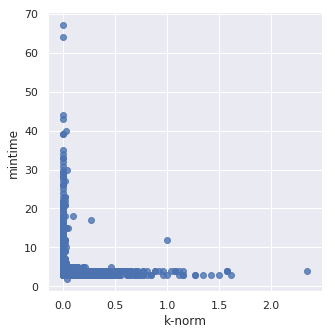

In [23]:
sns.lmplot(x="k-norm", y="mintime", data=df, fit_reg=False)

In [25]:
dataframelist = []
for dd in dirs[:4]:
    # create an empty df
    df = pd.DataFrame()
    
    # fill csv
    df = pd.read_csv(join(dd,'k_core.csv'), skiprows=12)
    
    # write name of simulation
    df['data'] = pd.Series([dd] * len(df), index=df.index)
    
    # filter remove k-core 0 and 11
    df = df.loc[df['k-core'] != 0]
    df = df.loc[df['k-core'] != 11]

    # find the minimum time for stiflers and for simulation
    mintime = df.loc[
        df['state']=='r'
    ].loc[
        df['data'] == dd
    ].sort_values('agent').groupby(['agent'])[['time']].min()

    # append the column
    df['mintime'] = mintime
    
    # evaluate knorm
    k_norm = df.apply(lambda row: 
                  ( row['degree'] - 
                   minmax[row['k-core']]['min'] ) /
                  ( minmax[row['k-core']]['max'] - 
                   minmax[row['k-core']]['min']), axis=1)
    
    # append column
    df['k-norm'] = k_norm

    # drop all NaN rows
    df = df.dropna(how='any')

    # drop time, agent, state columns
    try:
        df = df.drop(columns=['time', 'state'])
    except:
        print('drop failed')
    
    # create one big dataframe
    dataframelist.append(df)
dff = pd.concat(dataframelist)

In [26]:
mean_min_time = dff.groupby(['agent'])[['mintime']].apply(np.mean)
dff = dff.set_index(['agent'])
dff['meanmintime'] = mean_min_time
dff = dff.drop_duplicates()
dff = dff.reset_index()

In [30]:
dff.to_feather("../knorm.feather")

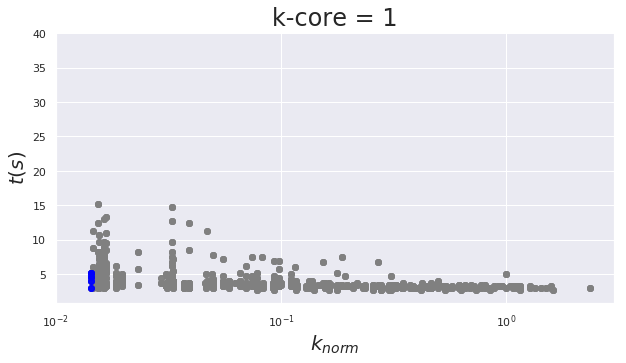

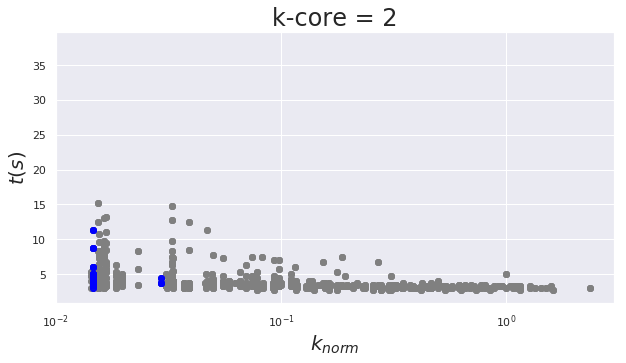

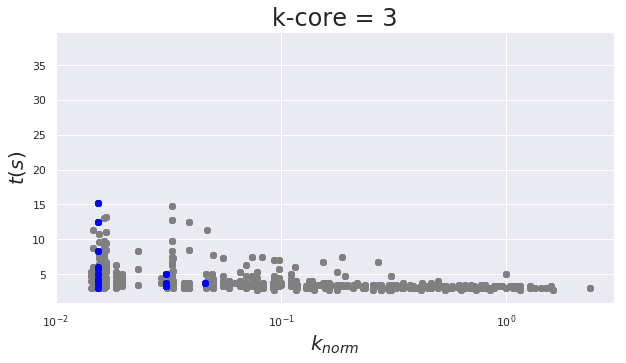

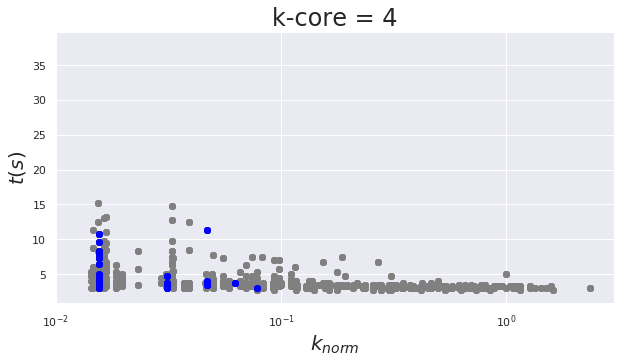

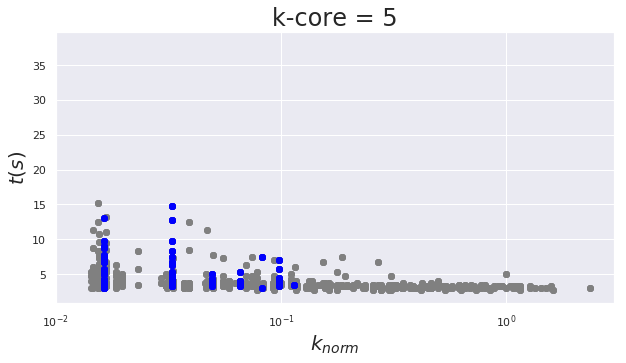

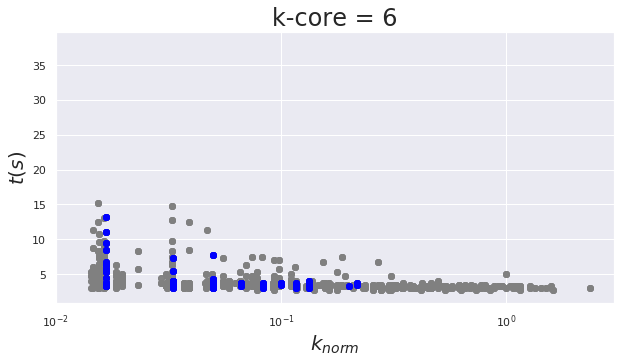

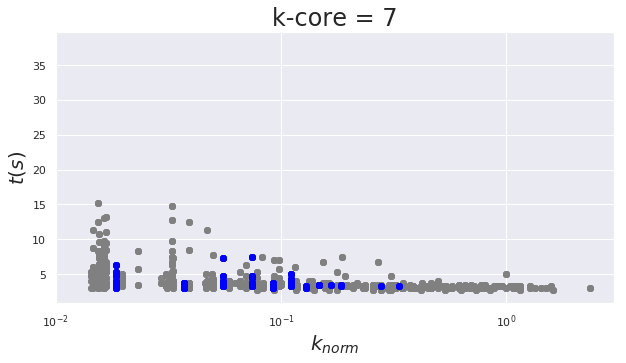

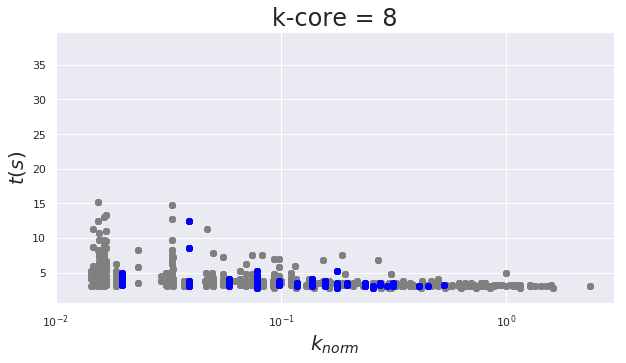

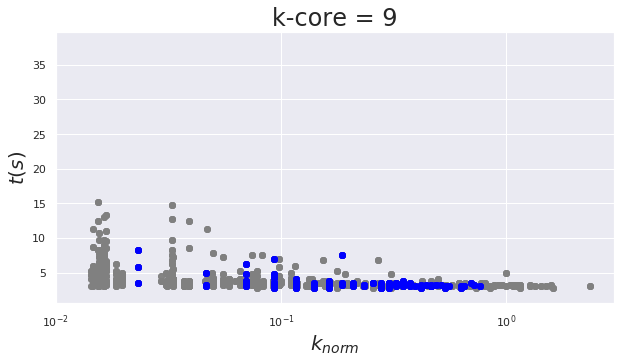

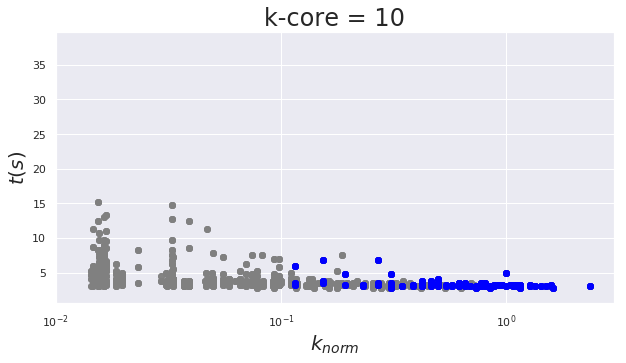

In [27]:
for index in range(11):
    if index == 0:
        continue
    fig, ax = plt.subplots()
    ax.set_xlim(0.01,3)
    ax.set(xscale="log",)
    sns.regplot(x="k-norm", y="meanmintime",data=dff, fit_reg=False, ax=ax, color='grey')
    sns.regplot(x="k-norm", y="meanmintime", data=dff.loc[dff['k-core'] == index], fit_reg=False, color='blue',ax=ax)
    #ax.set_xscale('log')
    plt.title("k-core = "+str(index),fontsize=24)
    plt.xlabel("$k_{norm}$",fontsize=20)
    plt.ylabel("$t(s)$",fontsize=20)
    plt.savefig("averagetimeonknorm"+str(index)+".pdf")
    plt.show()

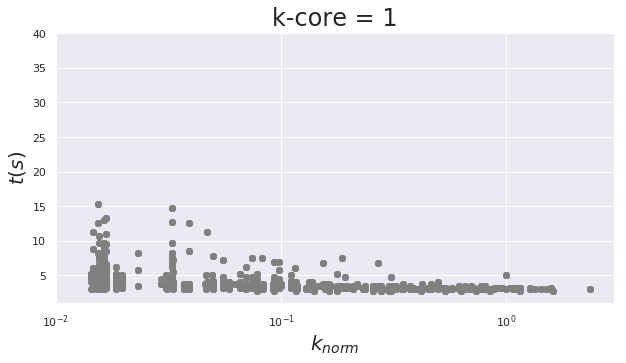

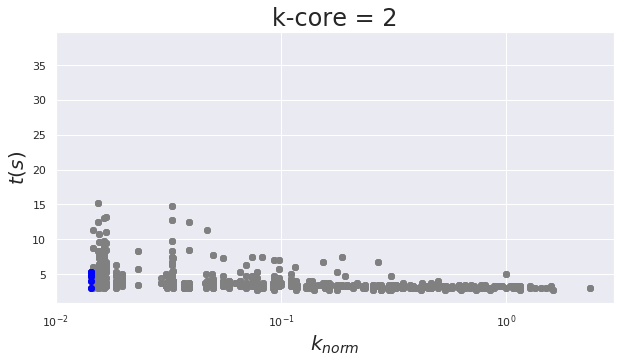

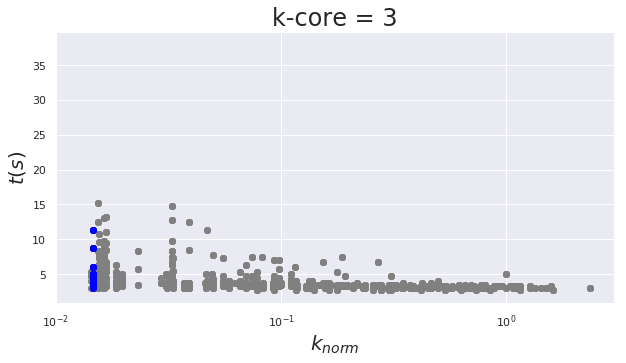

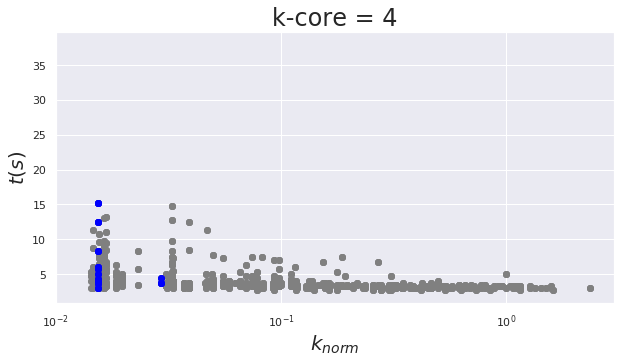

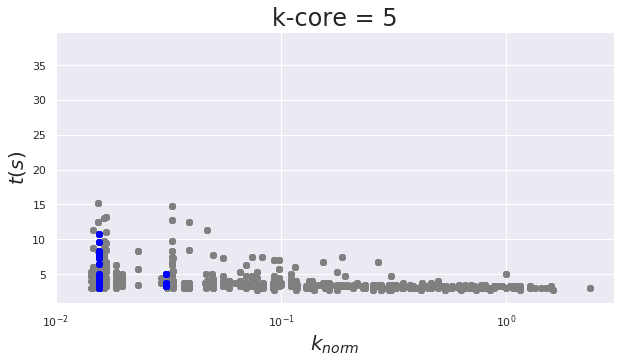

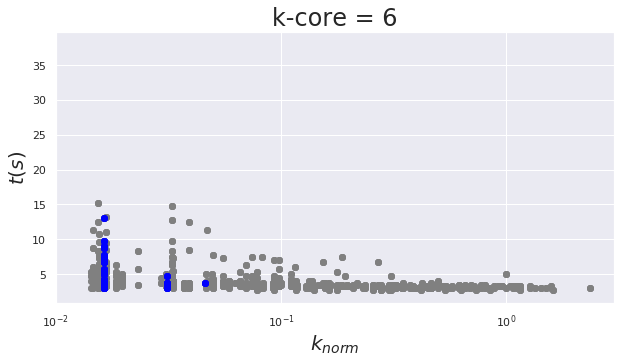

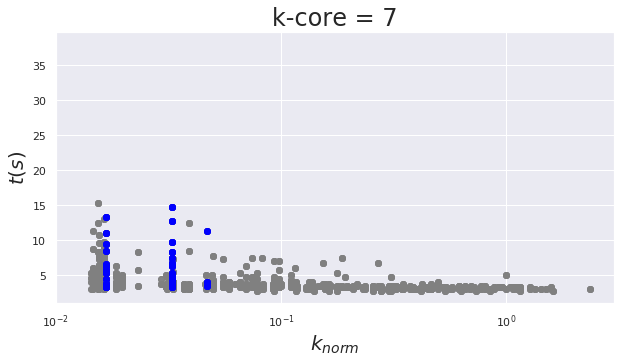

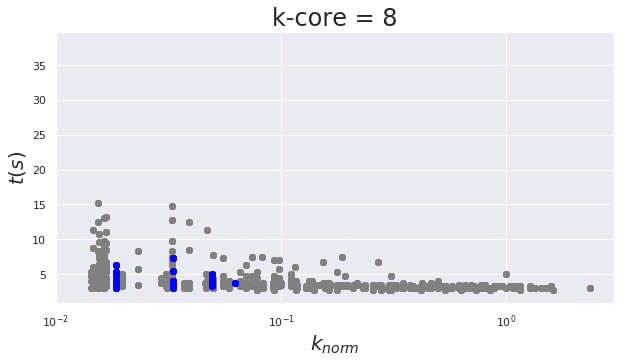

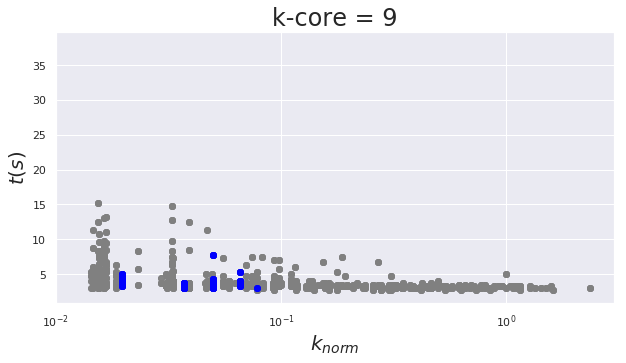

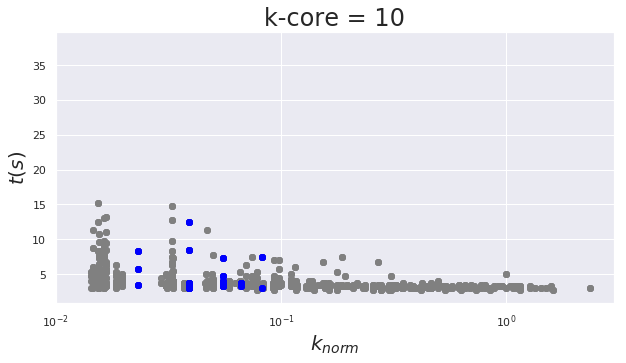

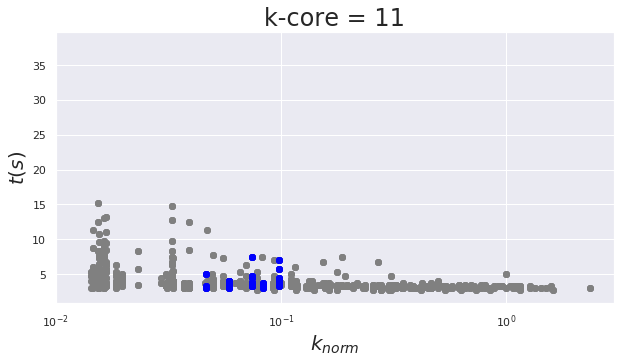

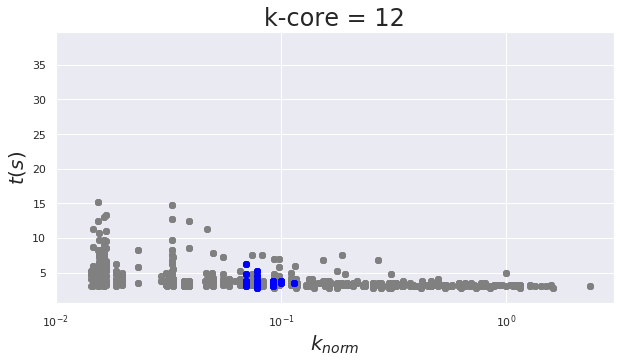

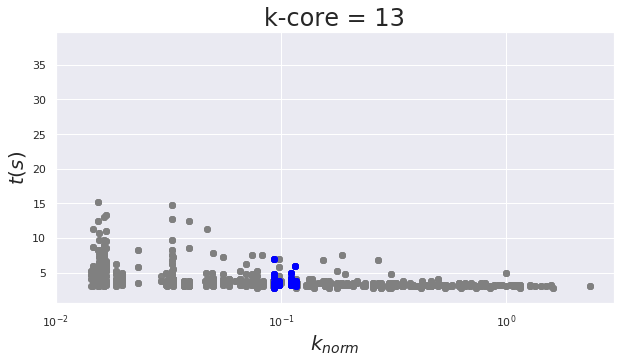

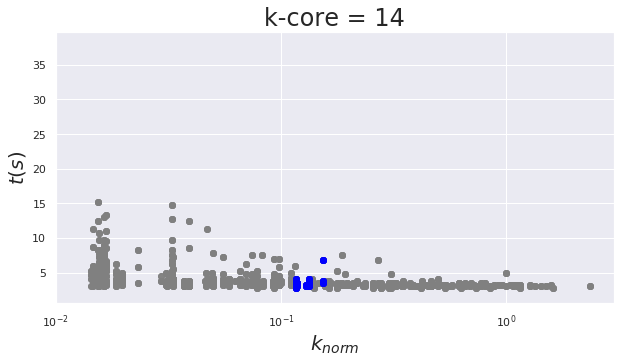

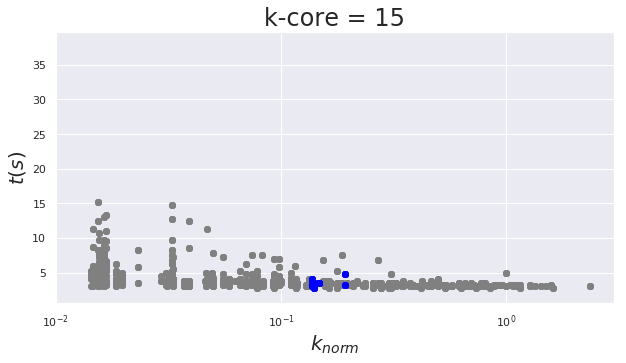

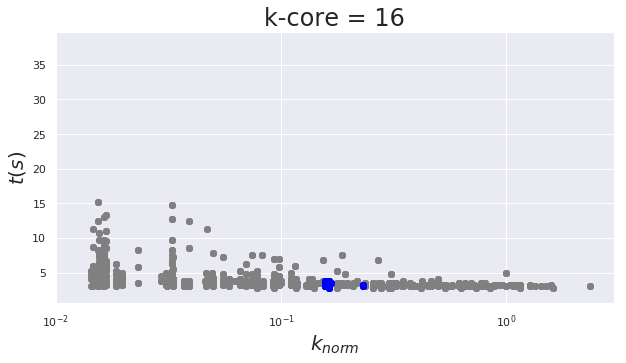

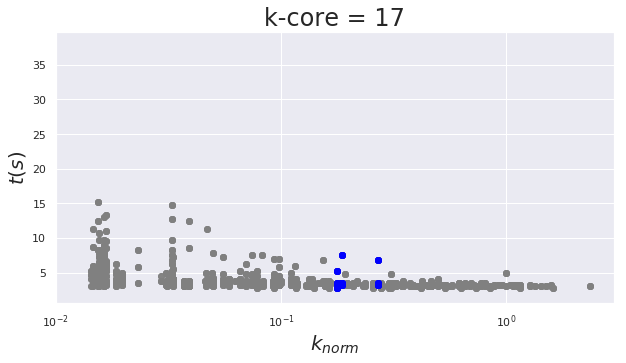

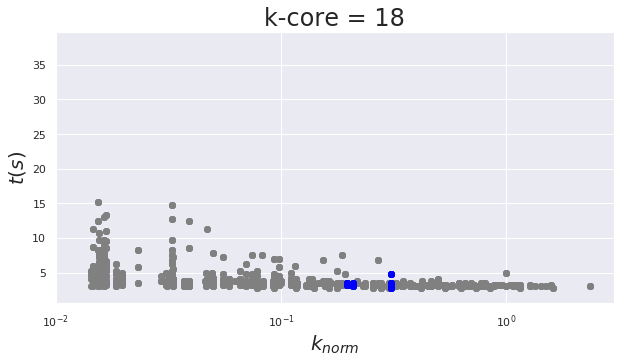

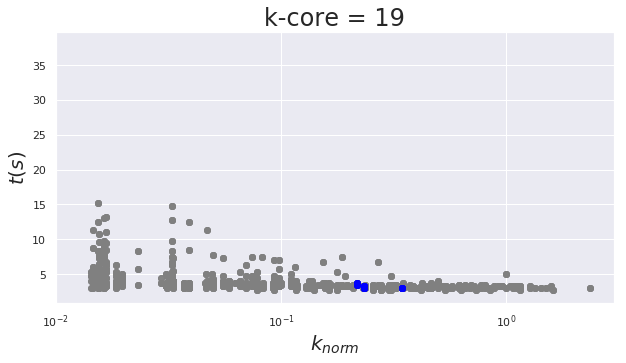

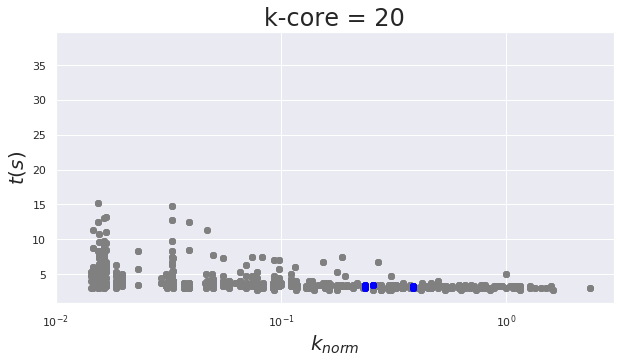

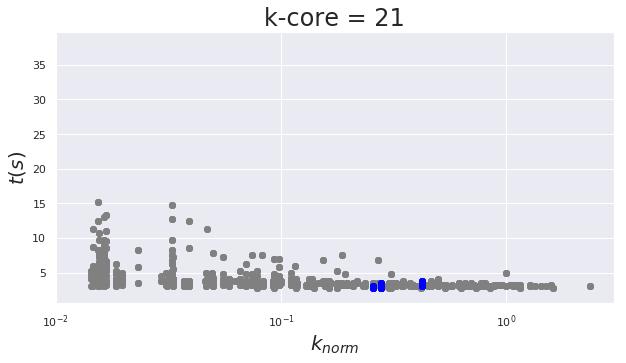

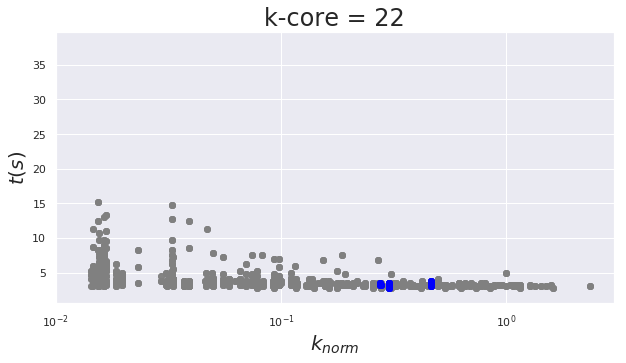

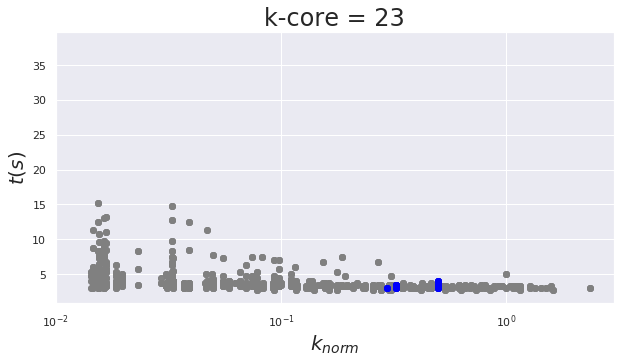

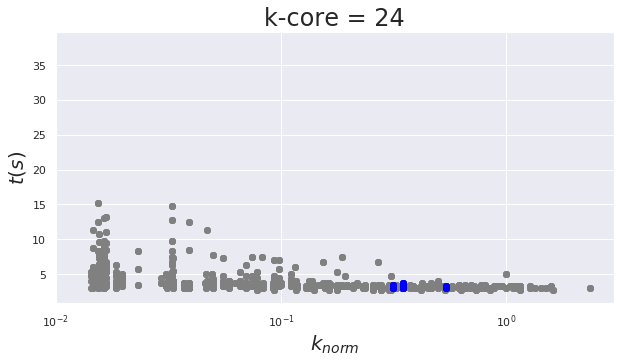

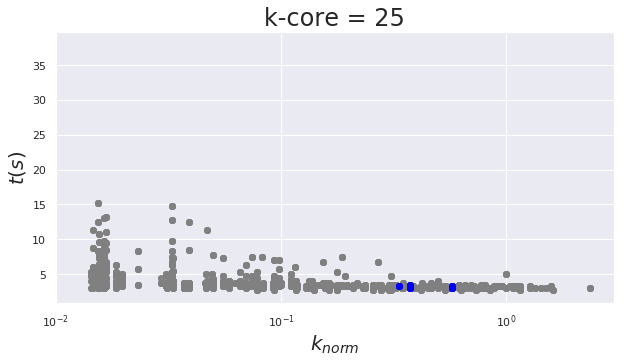

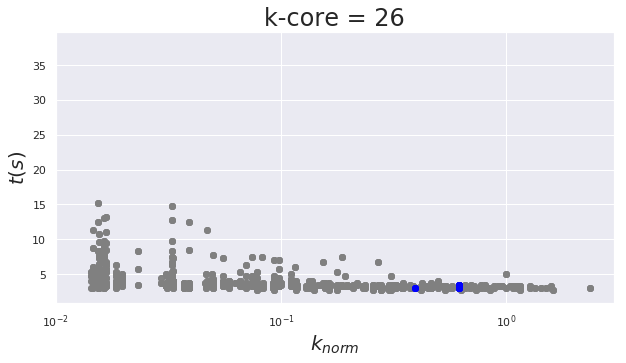

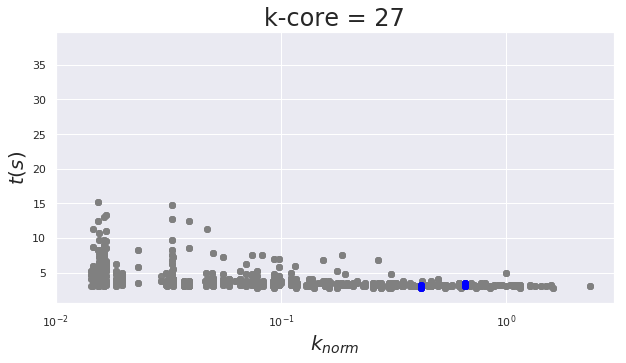

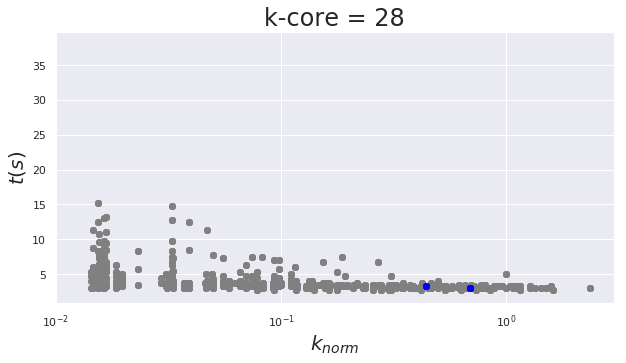

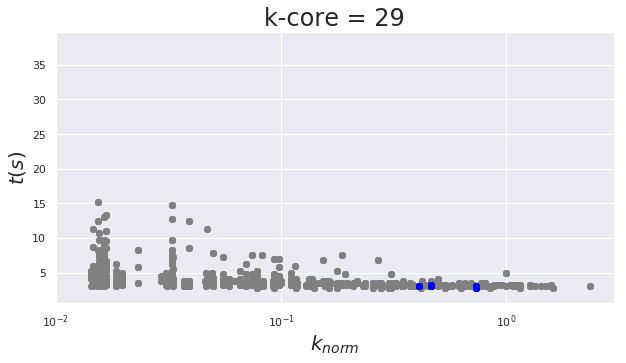

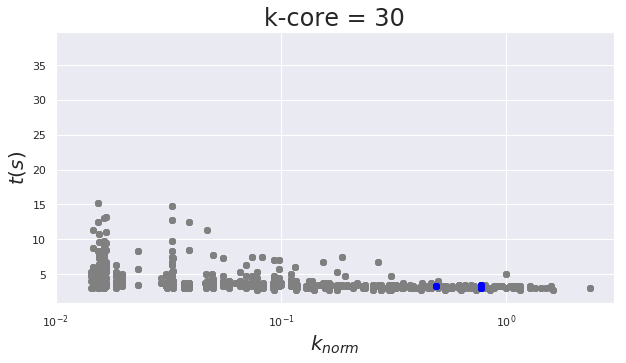

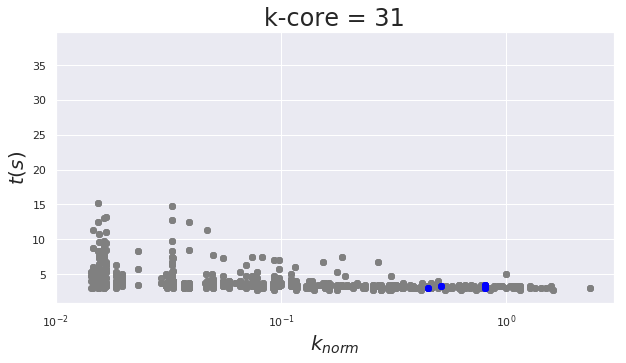

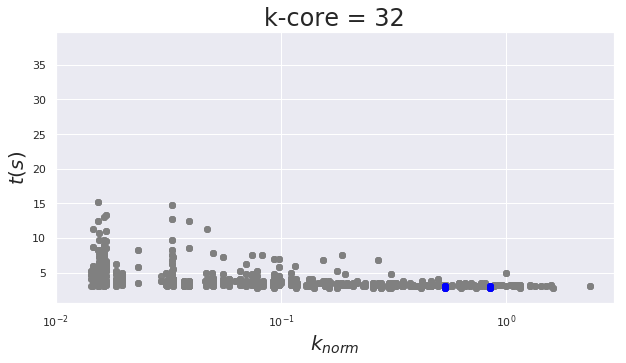

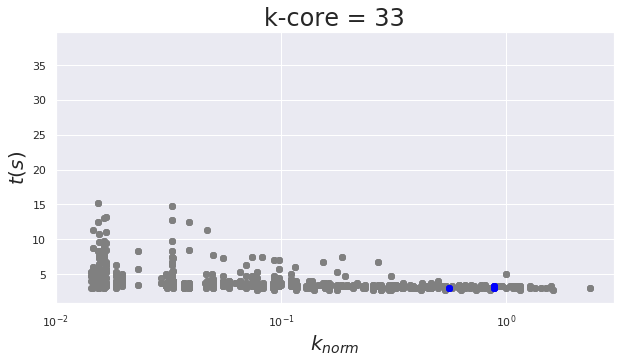

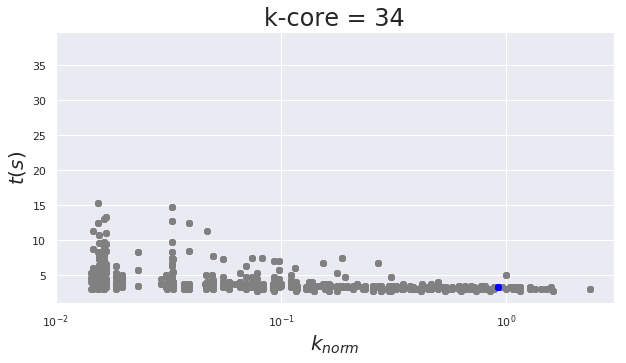

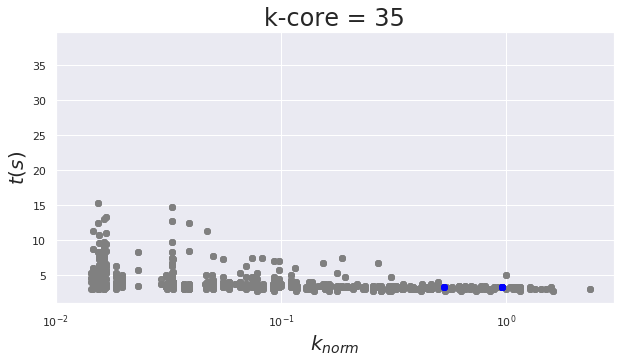

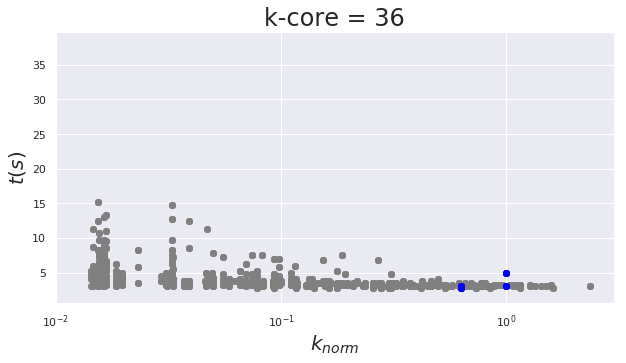

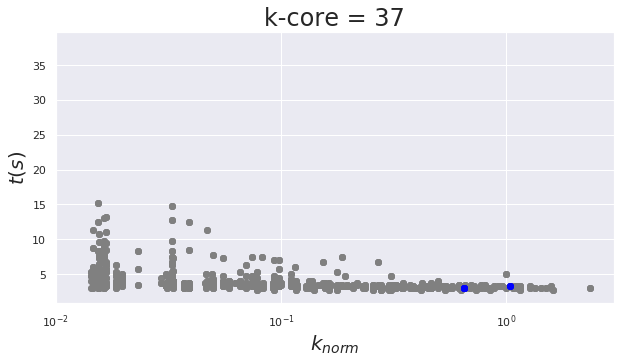

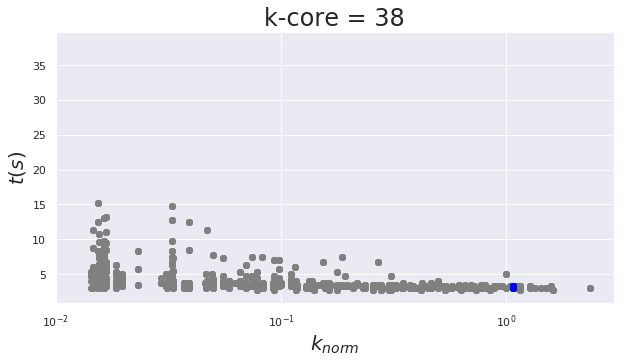

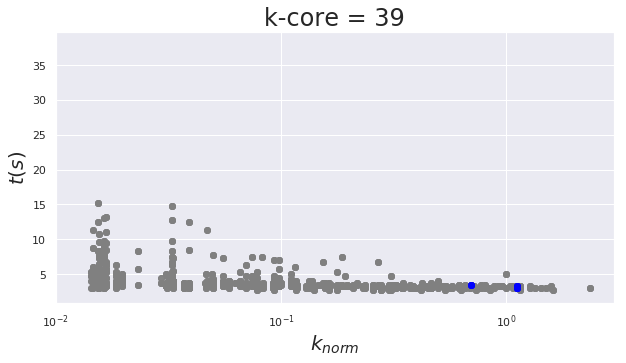

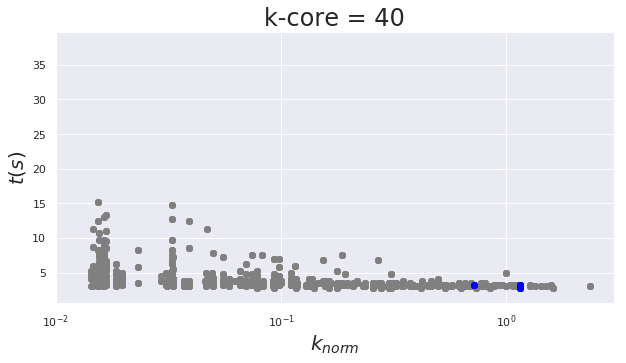

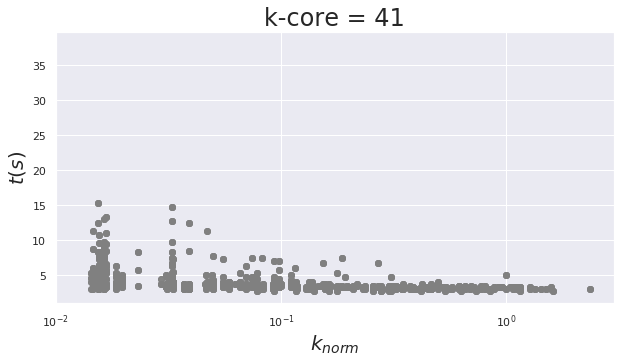

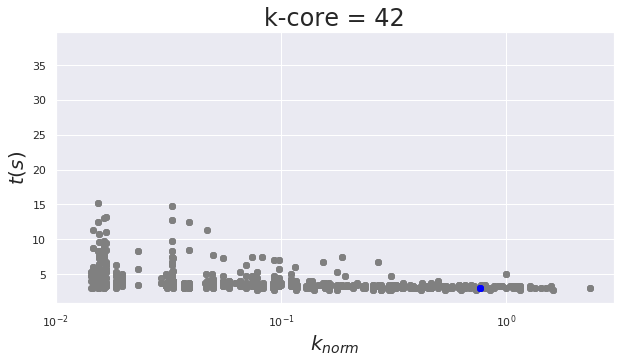

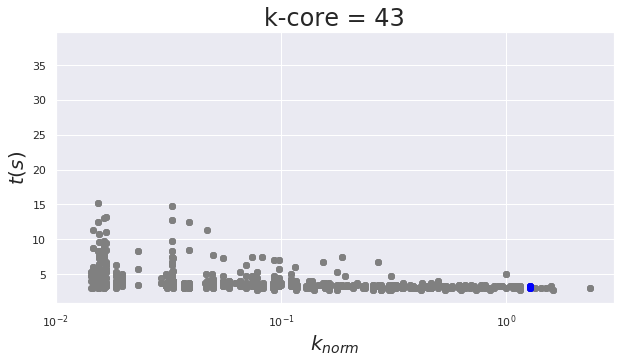

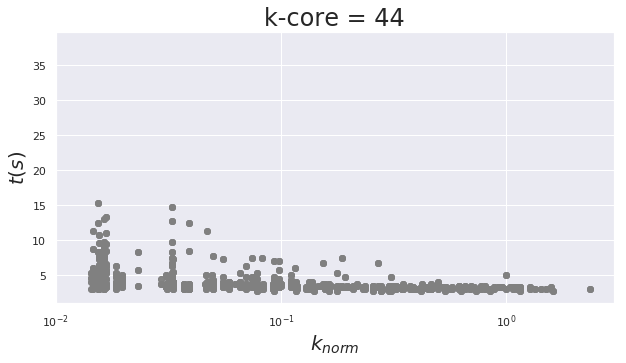

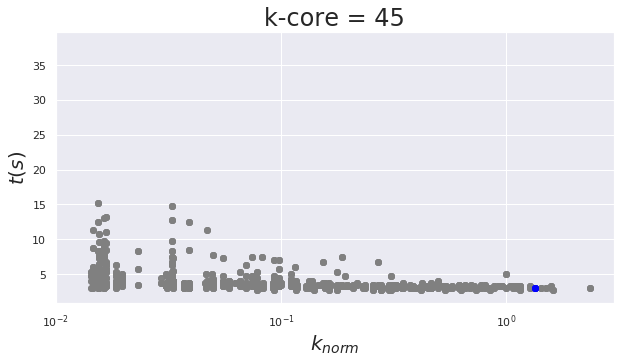

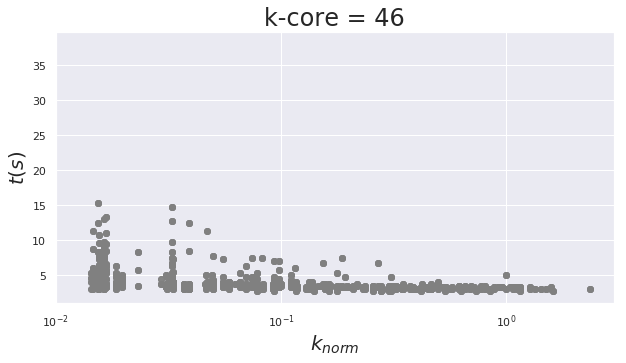

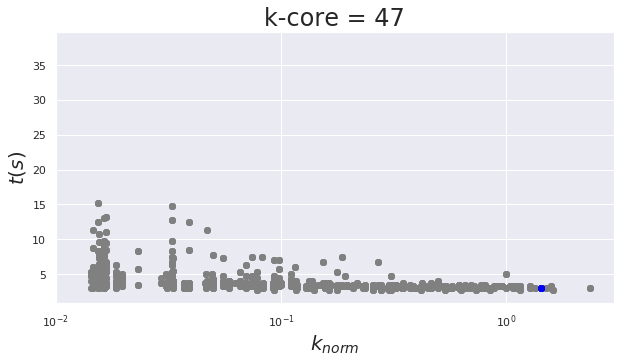

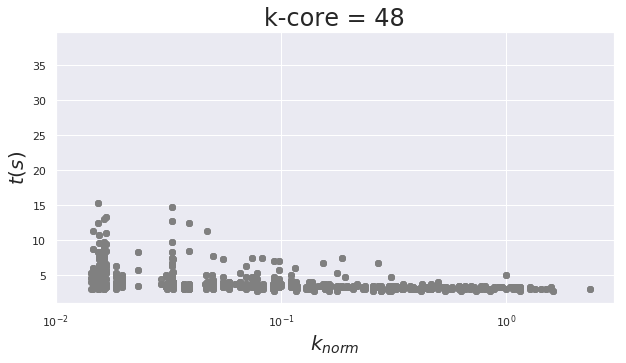

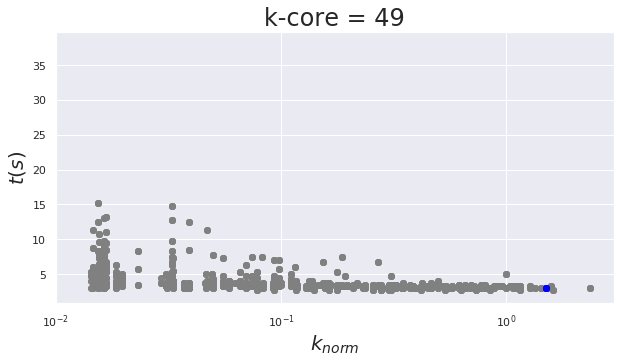

In [28]:
for index in range(50):
    if index == 0:
        continue
    fig, ax = plt.subplots()
    ax.set_xlim(0.01,3)
    ax.set(xscale="log",)
    sns.regplot(x="k-norm", y="meanmintime",data=dff, fit_reg=False, ax=ax, color='grey')
    sns.regplot(x="k-norm", y="meanmintime", data=dff.loc[dff['degree'] == index], fit_reg=False, color='blue',ax=ax)
    #ax.set_xscale('log')
    plt.title("k-core = "+str(index),fontsize=24)
    plt.xlabel("$k_{norm}$",fontsize=20)
    plt.ylabel("$t(s)$",fontsize=20)
    plt.show()

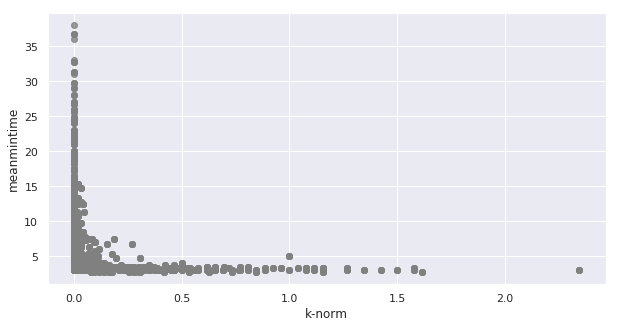

In [29]:
fig, ax = plt.subplots()
#ax.set_xscale("log")
sns.regplot(x="k-norm", y="meanmintime",data=dff, ax=ax, fit_reg=False, color='grey')


In [59]:
k_norm

,k-core,degree
0,0,0
1,10,30
2,10,23
3,10,38
4,9,22
5,8,10
6,10,21
7,10,26
8,7,8
9,10,17
